<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/Integraci%C3%B3n%20MC(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método de Monte Carlo ordinario**

La idea central del método de integración Monte Carlo es la siguiente: si deseamos calcular la integral $I=\int_a^b g(x) \, dx$ para alguna función $g(x)$ difícil de integrar analíticamente, podemos hacer la siguiente sustitución:
$$I=\int_a^b g(x) \, dx=\int_a^b w(x)f(x) \, dx$$
con $w(x)=g(x)(b-a)$ y $f(x)=\frac{1}{(b-a)}$. Por tanto, la integral  transformada puede interpretarse como un múltiplo del valor esperado de g(x) bajo la distribución uniforme:
$$E(g(X))=\frac{I}{(b-a)}, \ con \ X\sim Unif(a,b). \ \ \ \ (1)$$
Si tomamos una muestra de números pseudoaleatorios uniformemente distribuidos, digamos $X_1,...,X_N \sim Unif(a,b).$ Por la ley de los grandes números: Se tiene con probabilidad 1, que $\lim_{n \to \infty} \frac{X_1+...+X_n}{n}=\mu$, para N sifucientemente grande tendremos que, con probabilidad 1:
$$\frac{1}{N} \sum_{i=1}^{N}g(X_i) \Rightarrow E(g(X))=\frac{I}{(b-a)} \ \ \
 \ \  \ \ \  \ \ \ \ \ \ (2)$$
 **Ejemplo : Para ilustrar el método de integración MC calculemos:**
 $$\int_0^1 \sqrt{arctan(x)} \, dx$$
que es no integrable para métodos analíticos. Se puede estimar esta integral numéricamente: por ejemplo, mediante sumas de Riemann, implementando el método de Monte Carlo (MC) de acuerdo a la ecuación (2) o implementando un MC en la región bidimensional que acota la función $f(x)=\sqrt {arctan(x)}$ en el plano cartesiano.
Con sumas de Riemman la aproximación númerica a la integral se puede elaborar con base en un partición regular, $b_0=0,b_1,b_2,...,b_n=1$, del intervalo de integración, según la conocida fórmula del cáculo:
$$I=\frac{1}{n}[g(b_1)+...+g(b_n)], \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  (3) \\ \\ $$
donde $g(x)=\sqrt{arctan(x)}$ y $b_i=\frac{i}{n}$  para  $i=1,2,...,n.$

In [5]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def g(x):       #Esta función calcula los valores gi(x_i) y las guarda en una lista
  g_i=np.sqrt(np.arctan(x))
  return g_i

In [7]:
def Riemann_izquierda(g,a,b,n):       #Esta función calcula las sumas de Rieman por la izquierda
  h=(b-a)/n                           #Calcula espacio entre los intervalos
  x=np.linspace(a,b-h,n)              #Separa el intervalo (0,1) en n sub-intervalos
  g_i=g(x)                            #Guarda en una lista los valores de g(xi)
  I=h*sum(g(x))                       #Calcula el promedio de la lista g_i
  return x,g_i,I

In [8]:
def histograma(eje_x,eje_y,b,a,n,g):            #Imprime gráfica de la función
  X = np.linspace(a, b, 1000)                   #Genera 1000 puntos
  Y = g(X)                                      #Evalua los 1000 puntos
  plt.plot(X, Y, label='f(x) = (arctan(x))^1/2', color='red')         #Grafica la función f(x)
  plt.bar(eje_x, eje_y, width=(b-a)/n,  alpha=0.7, color='black',edgecolor="black",label='Suma de Riemann')  #Grafica las sumas de Riemman en barras
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.axvline(np.mean(aprox),label='Media')
  plt.axvline(np.mean(aprox)-np.std(aprox),label='Intervalo de confianza', color='red')
  plt.axvline(np.mean(aprox)+np.std(aprox), color='red')
  plt.title('Suma de Riemann por izquierda de f(x) ')
  plt.legend()
  print('Estimación (Media): ', np.mean(aprox))
  print('Intervalo de confianza: [', np.mean(aprox)-np.std(aprox),np.mean(aprox)+np.std(aprox),']' )
  return

Estimación (Media):  0.6351588374719915
Intervalo de confianza: [ 0.5793117023561305 0.6910059725878526 ]


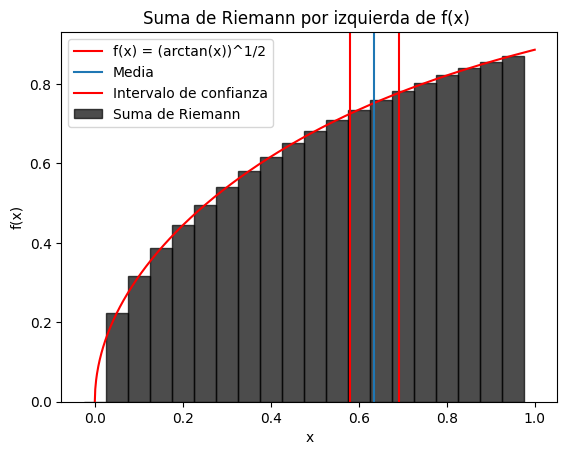

In [9]:
#Parámetros iniciales
a=0
b=1
n=20
eje_x,eje_y,I=Riemann_izquierda(g,a,b,n)
histograma(eje_x,eje_y,b,a,n,g)

Figura: Sumas de Riemman para el área bajo la curva $f(x)=\sqrt{arctan(x)}.$  
Esta figura muestra el esquema gráfico de esta aproximación.

El MC basado en la ley de los grandes números, ecuación (2), suele llamarse método MC de la Media Muestral. La aproximación númerica se obtiene de la siguiente expresión:
$$I=\frac{1}{n}[g(x_1)+...+g(x_n)], \ \ \ \ \ \ \ \ \ \ \ (4) \\ $$
donde $g(x)=\sqrt{arctan(x)} \ $ y $ \ x_i \sim Unif(0,1)$. La ecuaciones (3) y (4)  tienen aspectos  muy similares, sin embargo su interpretación  es muy distinta, pues en el primer caso los valores de la variable representan puntos igualmente espaciados en el intervalo de integración $(0,1)$ mientras que en el segundo caso los valores de la variable consisten en una muestra de números pseudoaleatorios uniformes para el mismo intervalo $(0,1)$;  entonces, de la ecuación $(1): \\ $
$$I=(b-a)E[g(X)] \\ $$
Y un estimador insesgado de esta integral es:
$$θ_1=(b-a)\frac{1}{n}\sum_{i=1}^{N}g(X_i) \ \ con \ \ X_i \sim Unif(0,1),$$
el cual tiene una varianza dada por:
$$Var(θ_1)=\frac{1}{n}[(b-1)\int_a^b g(x)^2 \, dx-I^2]. \\ $$
Entonces este método pude implementarse con el Algoritmo MC de la Media Muestral, presentado en la siguiente tabla, para estimar $\int_a^b g(x) \, dx.$


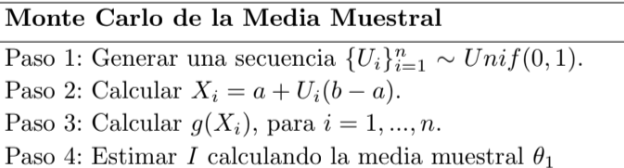


Estimación (Media):  0.6298979771100143
Intervalo de confianza: [ 0.601004962054439 0.6587909921655896 ]


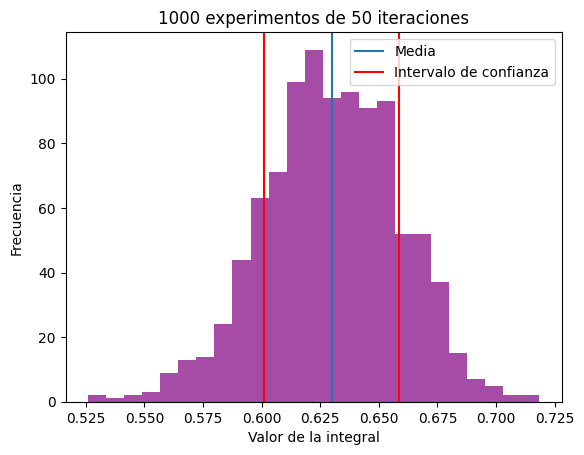

In [ ]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
def g(x):       #Esta función calcula los valores gi(x_i) y las guarda en una lista
  g_i=np.sqrt(np.arctan(x))
  return g_i
def exp(n,a,b):
  Ui=np.random.uniform(0, 1, n)       #Genera n variables ~ U(0,1)
  Xi=a+Ui*(b-a)                       #Calcula lista de Xi
  g_i=g(Xi)                           #Calcula lista de g(Xi)
  I=(b-a)/n*np.sum(g_i)               #Calcula aproximación

  return I
def histograma(aprox):                                  #Esta función imprime la estimación y el histograma
  plt.hist(aprox, bins=25, color='purple', alpha=0.7)
  plt.title('1000 experimentos de 50 iteraciones')
  plt.axvline(np.mean(aprox),label='Media')
  plt.axvline(np.mean(aprox)-np.std(aprox),label='Intervalo de confianza', color='red')
  plt.axvline(np.mean(aprox)+np.std(aprox), color='red')
  plt.xlabel('Valor de la integral')
  plt.ylabel('Frecuencia')
  plt.legend()
  print('Estimación (Media): ', np.mean(aprox))
  print('Intervalo de confianza: [', np.mean(aprox)-np.std(aprox),np.mean(aprox)+np.std(aprox),']' )
  return
#Simulacion

#Parametros
m=1000        #Número de iteraciones
n=50           #Tamaño de la experimentos
a=0             #Límite inferior de la integral
b=1             #Límite superior de la integral

aprox=[]
for i in range(m):
  aprox.append(exp(n,a,b))

histograma(aprox)

La Figura muestra el histograma de los resultados de esta integración MC
repetida 1000 veces. Para hacer evidente la distribución estadística subyacente a este experimento, en este caso hemos tomado un valor pequeño para el tamaño de las muestras de números pseudoaleatorios (n = 50).
Considerando la aproximación de $\int_0^1 \sqrt{arctan(x)} \, dx$ por método MC de la media muestral.

**Método de acierto y error.**


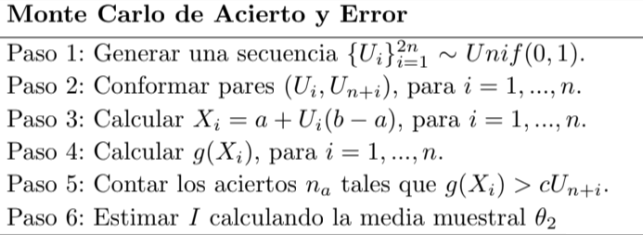

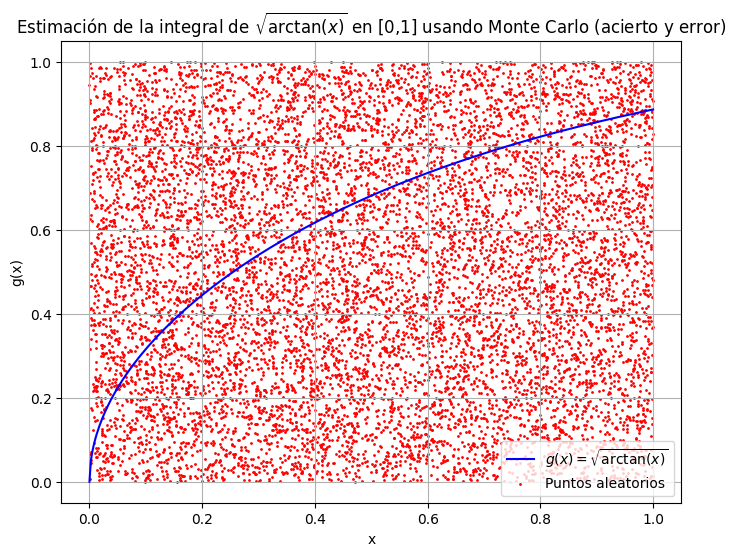

In [ ]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función g(x)
def g(x):
    return np.sqrt(np.arctan(x))

# Parámetros iniciales
a = 0
b = 1
n = 10000  # Número de puntos aleatorios
M = 1  # Máximo valor de g(x) en el intervalo [0, 1]

# Generamos puntos aleatorios (x, y)
x_random = [rnd.uniform(a, b) for _ in range(n)]
y_random = [rnd.uniform(0, M) for _ in range(n)]

# Contamos cuántos puntos están debajo de la curva g(x)
under_curve = [1 if y < g(x) else 0 for x, y in zip(x_random, y_random)]
num_under_curve = sum(under_curve)

# Calculamos la estimación de la integral
area_rect = (b - a) * M
integral_estimada = (num_under_curve / n) * area_rect

# Imprimir el resultado
#print(f"Estimación de la integral I usando Monte Carlo (acierto y error): {integral_estimada}")

# Gráfica de la función g(x) y los puntos muestrales
x_vals = np.linspace(a, b, 400)
y_vals = g(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='$g(x) = \\sqrt{\\arctan(x)}$', color='blue')
plt.scatter(x_random, y_random, color='red', s=1, label='Puntos aleatorios')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.title('Estimación de la integral de $\\sqrt{\\arctan(x)}$ en [0,1] usando Monte Carlo (acierto y error)')
plt.grid(True)
plt.show()


Estimación (Media):  0.6351588374719915
Intervalo de confianza: [ 0.5793117023561305 0.6910059725878526 ]
Estimación:  0.6351588374719915


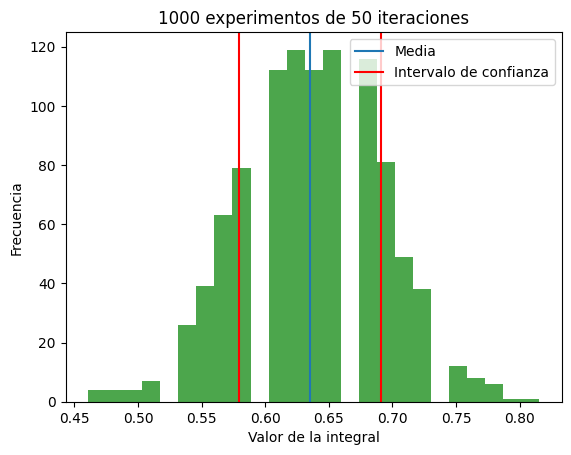

In [1]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
def g(x):       #Esta función calcula los valores gi(x_i) y las guarda en una lista
  g_i=np.sqrt(np.arctan(x))
  return g_i
def aceptacion_rechazo(n,Ui,g_i,a,b,c):     #Esta función aplica la condición de Aceptación y rechazo
  aciertos=0
  for i in range(n):
    if c*Ui[i-1] < g_i[i-1]:                #Condición de aceptación
      aciertos+=1                           #Aumenta el no. de acierto en +1
  I=c*(b-a)*aciertos/n                      #Calcula la estimación mediante la media muestral
  return I
def exp(n,a,b,c):                           #Esta función realiza los experimentos
  Ui1=np.random.uniform(0, 1, n)            #Genera primer número aleatorio
  Ui2=np.random.uniform(0, 1, n)            #Genera segundo número aleatorio

  Xi=a+Ui1*(b-a)                            #Calcula la lista Xi
  g_i=g(Xi)                                 #Calcula la lista gi

  I=aceptacion_rechazo(n,Ui2,g_i,a,b,c)

  return I
def histograma(aprox):
  plt.hist(aprox, bins=25, color='green', alpha=0.7)
  plt.title('1000 experimentos de 50 iteraciones')
  plt.axvline(np.mean(aprox),label='Media')
  plt.axvline(np.mean(aprox)-np.std(aprox),label='Intervalo de confianza', color='red')
  plt.axvline(np.mean(aprox)+np.std(aprox), color='red')
  plt.xlabel('Valor de la integral')
  plt.ylabel('Frecuencia')
  plt.legend()
  print('Estimación (Media): ', np.mean(aprox))
  print('Intervalo de confianza: [', np.mean(aprox)-np.std(aprox),np.mean(aprox)+np.std(aprox),']' )
  print('Estimación: ', np.mean(aprox))
  return
  #Simulacion

#Parametros
m=1000                          #Número de iteraciones
n=50                            #Tamaño de la experimentos
a=0                             #Límite inferior de la integral
b=1                             #Límite superior de la integral
c=np.sqrt(np.arctan(1))         #Cota superior g(x)<c
aprox=[]

for i in range(m):              #Simulación de m experimentos
  aprox.append(exp(n,a,b,c))

histograma(aprox)